# Домашнее задание 1 по статистическому анализу на python

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [16]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [17]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

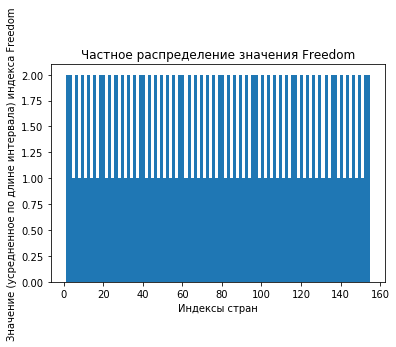

In [18]:
plt.hist(df['Freedom'], bins=100)
plt.title('Частное распределение значения Freedom')
plt.xlabel('Индексы стран')
plt.ylabel('Значение (усредненное по длине интервала) индекса Freedom')

plt.show()

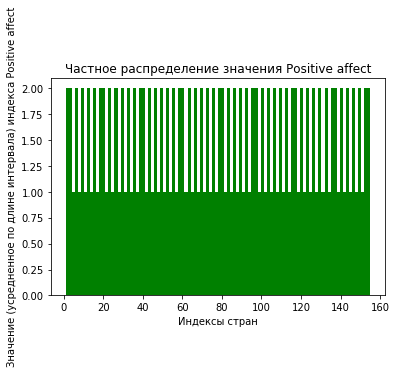

In [19]:
plt.hist(df['Positive affect'], bins=100, color= 'g')
plt.title('Частное распределение значения Positive affect')
plt.xlabel('Индексы стран')
plt.ylabel('Значение (усредненное по длине интервала) индекса Positive affect')

plt.show()

Я бы сказал, что частотные распределения обоих значений при разных параметрах bins (10, 20, 50, 100 и 150) не показывают ни нормального распределения, ни равномерного распределения. Просто частотная диаграмма ни для Positive affect ни для Freedom не дает исчерпывающей картины.

Получим немного больше информации о дата фрейме и колонке Freedom

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [21]:
# У нас есть одно отсутсвующее значение, что портит применение статистических функций.
df['Freedom'].isnull().sum()

1

In [22]:
# Сделаем очищенный датафрейм. Уменьшение выборки на 1 значение из 156 позволяет сохранить примемлемую точность
df_cleaned = df[['Freedom']].dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 1 columns):
Freedom    155 non-null float64
dtypes: float64(1)
memory usage: 2.4 KB


In [23]:
df_cleaned.head()

,Freedom
0,5.0
1,6.0
2,3.0
3,7.0
4,19.0


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [24]:
# Среднее значение, оно же математическое ожидание
df['Freedom'].sum() / len(df['Freedom'])

77.5

In [25]:
# В колонке Freedom есть одна строка без значения, . Применяем на очищенной выборке
statistics.mean(df_cleaned['Freedom'])

78.0

In [26]:
# Медиана
statistics.median(df['Freedom'])

71.0

In [27]:
# Мода - результат применения функции дает 156 равнозначно часто встречающихся значений
statistics.mode(df['Freedom'])

StatisticsError: no unique mode; found 156 equally common values

In [28]:
# Минимум и максимум. Размах.
print("Минимум: ", df['Freedom'].min(), "\n", "Максимум: ", df['Freedom'].max() )
print("Размах: ", df['Freedom'].max() - df['Freedom'].min())

Минимум:  1.0 
 Максимум:  155.0
Размах:  154.0


In [29]:
# Дисперсия
statistics.pvariance(df_cleaned['Freedom'])

2002.0

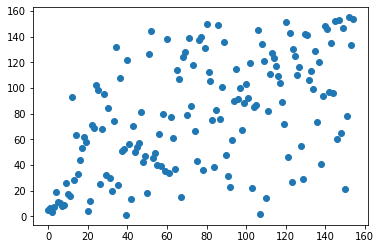

In [30]:
# Выбросы. Мы уже знаем про 1 отсутствующее значение. Проверяем, есть ли точки, слишком сильно выбивающиеся от распределения
plt.scatter(range(155),df_cleaned['Freedom'])
# Явных точек с неоправданно высокими значениями нет

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

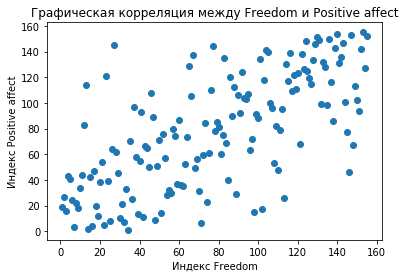

In [31]:
plt.scatter(df['Freedom'], df['Positive affect'])
plt.title('Графическая корреляция между Freedom и Positive affect')
plt.xlabel('Индекс Freedom')
plt.ylabel('Индекс Positive affect')

plt.show()

In [32]:
print(df[['Freedom']].info(), df[['Positive affect']].info())
# Есть по 155 значений обоих пареметров и по 1 отсутствию значения.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 1 columns):
Freedom    155 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 1 columns):
Positive affect    155 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None None


In [33]:
from scipy.stats import pearsonr

# Вычисление по неочищенным данным дает значение nan. Чтобы получить обрабатываемое значение, очищаем.
corr,p_value = pearsonr(df['Freedom'].dropna(), df['Positive affect'].dropna())
print(corr)
# Полученное значение показывает прямую (коэфф больше 0) и достаточно высокую (почти 0,7) корреляцию

0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [34]:
# Центрируем
freedom_centered = df_cleaned['Freedom'] - statistics.mean(df_cleaned['Freedom'])

print("До центрирования: ", statistics.mean(df_cleaned['Freedom']), 
    "  После центрирования: ", statistics.mean(freedom_centered) )

До центрирования:  78.0   После центрирования:  0.0


In [35]:
# Масштабируем
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freed_norm2 = min_max_scaler.fit_transform(np.array(df_cleaned['Freedom']).reshape(-1, 1))
print("Новое минимальное значение: ", freed_norm2.min(),"\n", "Новое максимальное значение: ", freed_norm2.max())

Новое минимальное значение:  -0.9999999999999999 
 Новое максимальное значение:  1.0000000000000002


Построить матрицу корреляций для всех колонок таблицы

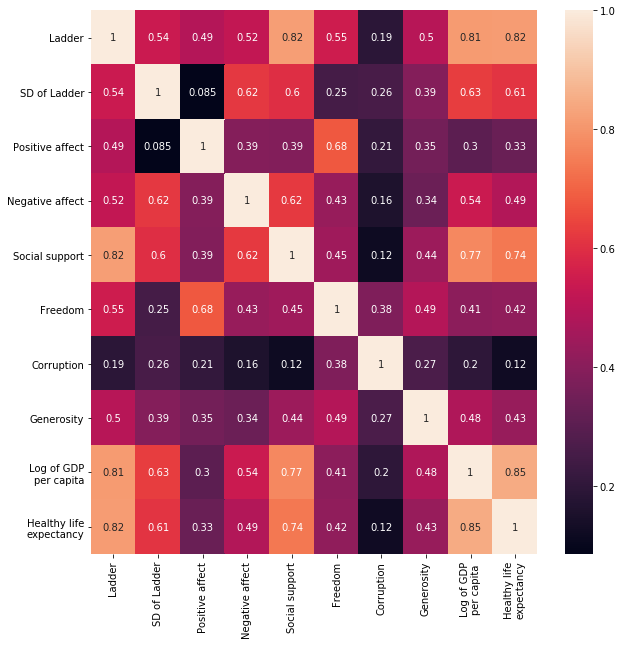

In [36]:
from pylab import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 10,10

sns.heatmap(df.corr(), annot = True)

Загрузить следующую таблицу: 

In [37]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

(array([  2.,   3.,   8.,  16.,  35.,  17.,  31.,  50.,  67., 102.,  88.,
        169., 180., 207., 216., 165., 284., 365., 417., 541., 498., 352.,
        532., 497., 530., 544., 387., 473., 516., 495., 428., 296., 514.,
        462., 491., 514., 310., 535., 469., 487., 466., 423., 269., 393.,
        380., 298., 326., 182., 347., 328., 276., 257., 154., 201., 163.,
        167., 135.,  97., 133.,  89.,  94.,  91.,  69.,  39.,  59.,  49.,
         64.,  57.,  36.,  40.,  23.,  25.,  17.,  12.,  15.,  24.,  21.,
         16.,  13.,  11.,   9.,  14.,  11.,   7.,   6.,  14.,  10.,   5.,
          8.,   2.,   3.,   2.,   3.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.]),
 array([0.44  , 0.4681, 0.4962, 0.5243, 0.5524, 0.5805, 0.6086, 0.6367,
        0.6648, 0.6929, 0.721 , 0.7491, 0.7772, 0.8053, 0.8334, 0.8615,
        0.8896, 0.9177, 0.9458, 0.9739, 1.002 , 1.0301, 1.0582, 1.0863,
        1.1144, 1.1425, 1.1706, 1.1987, 1.2268, 1.2549, 1.283 , 1.3111,
        1.3392, 1.3673, 1.3954

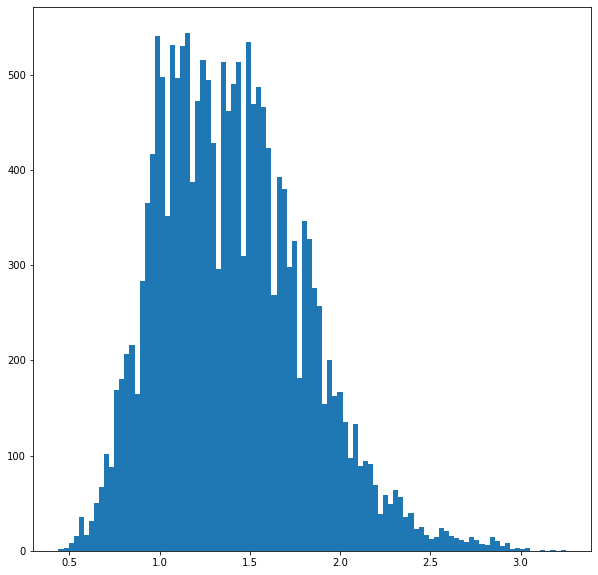

In [38]:
plt.hist(df['AveragePrice'], bins=100)
# При разных интервалах распределение близко к нормальному

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

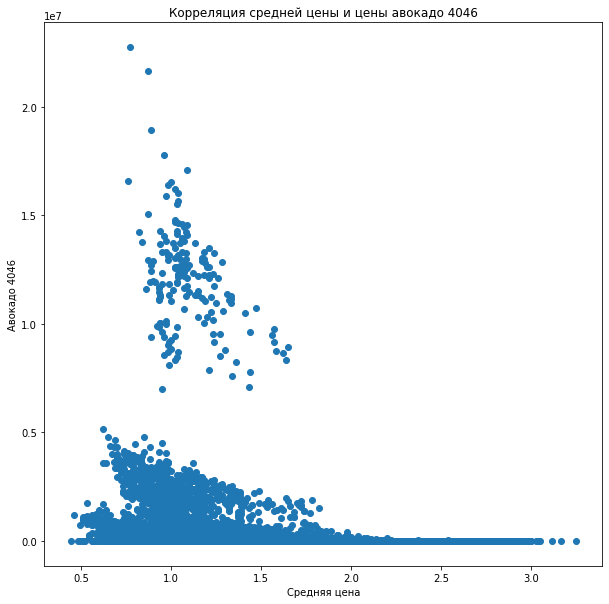

In [39]:
plt.scatter(df['AveragePrice'], df['4046'] )
plt.title('Корреляция средней цены и цены авокадо 4046')
plt.xlabel('Средняя цена')
plt.ylabel('Авокадо 4046')

plt.show()

          0         1
0  0.316726  0.000046
1  0.323843  0.000030
2  0.174377  0.000035
3  0.227758  0.000050
4  0.298932  0.000041


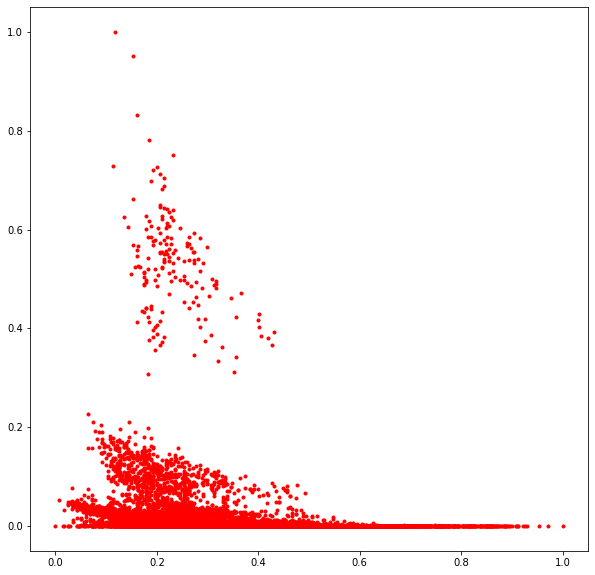

In [40]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['AveragePrice', '4046']])
df_norm = pd.DataFrame(np_scaled)

avocado = df_norm[1]
average_price = df_norm[0]

print(df_norm[:5])

plt.plot(average_price, avocado, 'r.')
plt.show()